# The series expansions for a test distribution function

In this notebook we explore how series expansion works for a test function shown below. We will work with both Gram-Charlier and Edgeworth series for this.

#### Defining the function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import overlapper.edist.series_distributions as sd
import math

The following test function has been used for examining the performance of series expansion methods:

$$f(x) = \frac{8}{3\pi} \ \cos^4(x) \left[ 1+\sin^3(4x) \right]$$

In [2]:
def test_dist(x):
    return math.cos(x)**4 * (1 + math.sin(4*x)**3) *(8/(3*np.pi))

In [3]:
def test_dist_array(x_array):
    out_array = []
    
    for x in x_array:
        out_array += [test_dist(x)]
        
    return np.array(out_array)

The moments of the above function are calculated numerically and are shown below:

$$\langle 1 \rangle , \langle x \rangle, \langle x^2 \rangle, \ldots$$

In [4]:
moments = [1, 0.13028273809522378, 0.19746703342409092, 0.004295285708869032, 0.10211226258459466, -0.020994749089661105, 0.07790349663212205, -0.03222026676766618, 0.07452794737243855, -0.043235174966245314, 0.08292578976624673, -0.058146297820452796, 0.10288060615885983, -0.08010139204835584, 0.13860675238101272, -0.11340590632169932, 0.19922496627184863, -0.1649165959555919, 0.30169915241330636, -0.24597632070602368, 0.4769627898291071, -0.37567511575344104, 0.7817285441801457, -0.5865688987338135, 1.32113717674368, -0.9348544609555193, 2.292494647005191, -1.5186606077697578, 4.070486566964885, -2.511236598629837, 7.374690610675784, -4.221705515444972, 13.601683797478385, -7.207222597118478, 25.48878697595546, -12.48172266090369, 48.4506901029198, -21.907477168498172, 93.29033172941217, -38.93506417004101, 181.73393584282022];


Below the mean and the standard deviation of the distribution are calculated. 
Also, standardized moments are calculated, which are basically obtained by rescaling and translation of the argument of $f$ so that it has zero mean and a variance of 1.

In [5]:
mu , sigma, s_mom = sd.standardize_moments(moments)
[mu , sigma]

[0.13028273809522378, 0.4248451971936393]

#### Gram-Charlier Series

Below, the Gram-Charlier expansion is shown for different orders and it can be seen that the function is almost reconstrcuted at order 30.

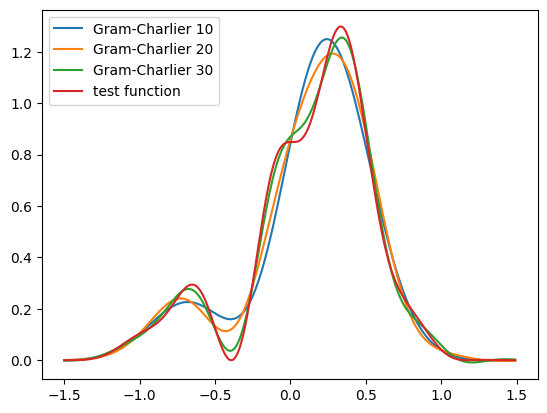

In [6]:
x_values = np.arange(-1.5,1.5,0.01) 

plt.plot(x_values, sd.gram_charlier_series(10 , x_values , moments ) , label="Gram-Charlier 10")
plt.plot(x_values, sd.gram_charlier_series(20 , x_values , moments ) , label="Gram-Charlier 20")
plt.plot(x_values, sd.gram_charlier_series(30 , x_values , moments ) , label="Gram-Charlier 30")

plt.plot(x_values , test_dist_array(x_values), label="test function")

plt.legend();

#### Edgeworth Series

Comparison between Gram-Charlier and Edgeworth:

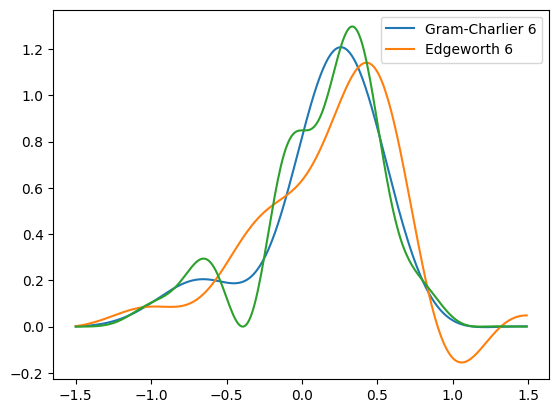

In [7]:
x_values = np.arange(-1.5,1.5,0.01) 

plt.plot(x_values, sd.gram_charlier_series(6 , x_values , moments ) , label="Gram-Charlier 6" )
plt.plot(x_values, sd.edgeworth_series(6 , x_values , moments ) , label="Edgeworth 6" )

plt.plot(x_values , test_dist_array(x_values))

plt.legend();

Higher order Edgeworth show rough oscillations:

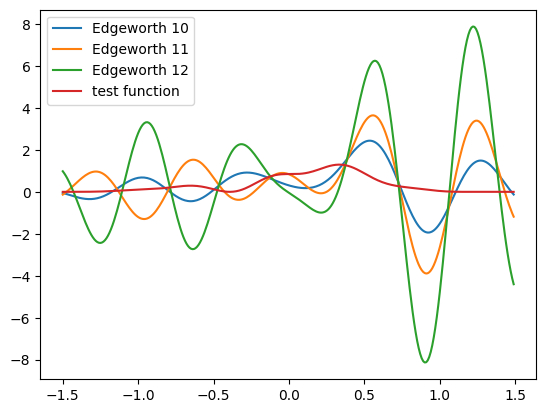

In [8]:
x_values = np.arange(-1.5,1.5,0.01) 

plt.plot(x_values, sd.edgeworth_series(10 , x_values , moments ) , label="Edgeworth 10"  )
plt.plot(x_values, sd.edgeworth_series(11 , x_values , moments ) , label="Edgeworth 11"  )
plt.plot(x_values, sd.edgeworth_series(12 , x_values , moments ) , label="Edgeworth 12"  )

plt.plot(x_values , test_dist_array(x_values) , label="test function" )

plt.legend();

Given the above unwanted oscillations, the performance of the two types of series should be assessed on a case-by-case basis.